# Customer Churn Predition Using Simple Aritifical Neural Network (ANN)

## Import Libary

In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Check diveces tensoflow
tf.config.experimental.list_physical_devices()

2024-06-05 05:56:07.983680: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-06-05 05:56:07.983794: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-06-05 05:56:08.130309: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'),
 PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

## Load the dataset

In [2]:
df = pd.read_csv('/kaggle/input/bank-customer-churn-modeling/Churn_Modelling.csv')
df.head(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
df.drop(['RowNumber','CustomerId','Surname'], axis = 'columns', inplace = True)

In [4]:
df.dtypes

CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

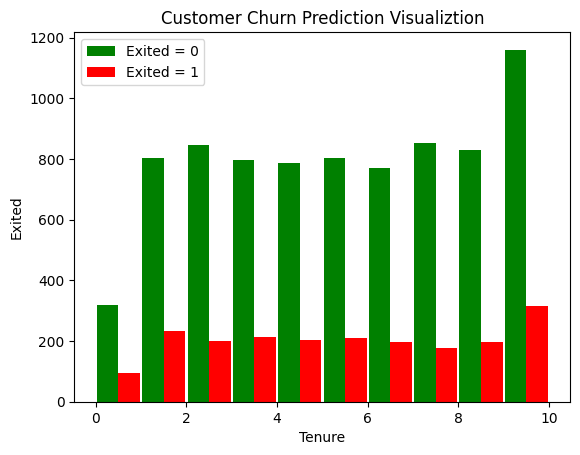

In [5]:
tenure_exited_0 = df[df.Exited==0].Tenure
tenure_exited_1 = df[df.Exited==1].Tenure

plt.xlabel('Tenure')
plt.ylabel('Exited')
plt.title('Customer Churn Prediction Visualiztion')

plt.hist([tenure_exited_0, tenure_exited_1],rwidth=0.95 ,color = ['green', 'red'], label = ['Exited = 0', 'Exited = 1'])
plt.legend()
plt.show()

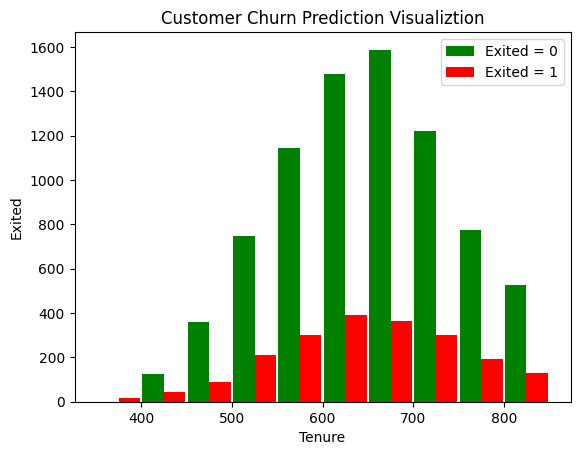

In [6]:
creditScore_exited_0 = df[df.Exited==0].CreditScore
creditScore_exited_1 = df[df.Exited==1].CreditScore

plt.xlabel('Tenure')
plt.ylabel('Exited')
plt.title('Customer Churn Prediction Visualiztion')

plt.hist([creditScore_exited_0, creditScore_exited_1],rwidth=0.95 ,color = ['green', 'red'], label = ['Exited = 0', 'Exited = 1'])
plt.legend()
plt.show()

In [7]:
def print_unique_col_values(df):
    for column in df:
        if df[column].dtypes == 'object':
            print(f'{column}: {df[column].unique()}')

In [8]:
print_unique_col_values(df)

Geography: ['France' 'Spain' 'Germany']
Gender: ['Female' 'Male']


In [9]:
df1 = df.copy()
df1.head(5)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [10]:
df1['Gender'].replace({'Female': 1,'Male': 0},inplace=True)
df1['Gender'].value_counts()

/tmp/ipykernel_35/3059296915.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df1['Gender'].replace({'Female': 1,'Male': 0},inplace=True)
/tmp/ipykernel_35/3059296915.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df1['Gender'].replace({'Female': 1,'Male': 0},inplace=True)


Gender
0    5457
1    4543
Name: count, dtype: int64

In [11]:
df1['Geography'].replace({'France': 0,'Spain': 1,'Germany': 2}, inplace=True)
df1['Geography'].value_counts()

/tmp/ipykernel_35/2874291458.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df1['Geography'].replace({'France': 0,'Spain': 1,'Germany': 2}, inplace=True)
/tmp/ipykernel_35/2874291458.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df1['Geography'].replace({'France': 0,'Spain': 1,'Germany': 

Geography
0    5014
2    2509
1    2477
Name: count, dtype: int64

In [12]:
df1.head(5)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,1,42,2,0.00,1,1,1,101348.88,1
1,608,1,1,41,1,83807.86,1,0,1,112542.58,0
2,502,0,1,42,8,159660.80,3,1,0,113931.57,1
3,699,0,1,39,1,0.00,2,0,0,93826.63,0
4,850,1,1,43,2,125510.82,1,1,1,79084.10,0


In [13]:
cols_to_scaler = ['CreditScore', 'Age', 'Tenure', 'Balance','EstimatedSalary','Geography', 'NumOfProducts']

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

df1[cols_to_scaler] = scaler.fit_transform(df1[cols_to_scaler])

In [14]:
for cols in df1:
    print(f'{cols}: {df1[cols].unique()}')

CreditScore: [0.538 0.516 0.304 0.698 1.    0.59  0.944 0.052 0.302 0.668 0.356 0.294
 0.252 0.398 0.57  0.532 0.606 0.474 0.752 0.764 0.572 0.32  0.638 0.992
 0.454 0.812 0.442 0.448 0.122 0.482 0.366 0.406 0.34  0.744 0.25  0.28
 0.908 0.464 0.244 0.23  0.412 0.968 0.62  0.852 0.958 0.574 0.4   0.696
 0.47  0.876 0.61  0.502 0.612 0.75  0.322 0.528 0.784 0.674 0.41  0.506
 0.802 0.462 0.77  0.622 0.65  0.776 0.926 0.614 0.508 0.338 0.628 0.656
 0.814 0.132 0.63  0.854 0.386 0.312 0.286 0.604 0.8   0.758 0.592 0.594
 0.916 0.348 0.838 0.76  0.33  0.846 0.928 0.72  0.126 0.546 0.64  0.544
 0.87  0.51  0.258 0.67  0.376 0.424 0.742 0.556 0.636 0.956 0.648 0.55
 0.164 0.84  0.816 0.89  0.672 0.878 0.478 0.222 0.468 0.458 0.626 0.664
 0.886 0.682 0.27  0.6   0.808 0.37  0.732 0.378 0.712 0.472 0.562 0.734
 0.9   0.666 0.708 0.53  0.634 0.268 0.26  0.456 0.324 0.512 0.494 0.856
 0.328 0.35  0.73  0.46  0.914 0.342 0.818 0.332 0.722 0.536 0.586 0.642
 0.678 0.54  0.652 0.444 0.69  0.484 0.4

In [15]:
df1.dtypes

CreditScore        float64
Geography          float64
Gender               int64
Age                float64
Tenure             float64
Balance            float64
NumOfProducts      float64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [16]:
df1['Exited'].value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

# Imbalanced Method SMOTE

In [17]:
X = df1.drop('Exited', axis = 'columns')
y = df1['Exited']

In [18]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy = 'minority')
X_sm, y_sm = smote.fit_resample(X,y)

y_sm.value_counts()

Exited
1    7963
0    7963
Name: count, dtype: int64

In [19]:
X.head(5)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,0.538,0.0,1,0.324324,0.2,0.000000,0.000000,1,1,0.506735
1,0.516,0.5,1,0.310811,0.1,0.334031,0.000000,0,1,0.562709
2,0.304,0.0,1,0.324324,0.8,0.636357,0.666667,1,0,0.569654
3,0.698,0.0,1,0.283784,0.1,0.000000,0.333333,0,0,0.469120
4,1.000,0.5,1,0.337838,0.2,0.500246,0.000000,1,1,0.395400


# Train test split

In [20]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size = 0.2, random_state = 15, stratify = y_sm)

In [21]:
y_train.value_counts()

Exited
0    6370
1    6370
Name: count, dtype: int64

In [22]:
len(X_train.columns)

10

In [23]:
from sklearn.metrics import confusion_matrix, classification_report

In [47]:
def ANN(X_train, y_train, X_test, y_test, optimizer, loss, epochs, weights):
    model = keras.Sequential([
        keras.layers.Dense(64, input_shape = (10,), activation = 'relu'),
        keras.layers.Dense(10, activation = 'relu'),
        keras.layers.Dense(1, activation = 'sigmoid')
    ])
    
    model.compile(optimizer = optimizer, loss = loss, metrics = ['accuracy'])
    
    if weights == -1:
        model.fit(X_train, y_train, epochs = epochs)
    else:
        model.fit(X_train, y_train, epochs = epochs, class_weight = weights)
        
    print(f'\nEvaluate : {model.evaluate(X_test, y_test)}')
    
    y_preds = model.predict(X_test)
    y_preds = np.round(y_preds)
    
    print('\nClassification Report: \n', classification_report(y_test, y_preds))
    
    return y_preds

In [48]:
y_preds = ANN(X_train, y_train, X_test, y_test, 'adam', 'binary_crossentropy', 100, -1)

Epoch 1/100


/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


399/399 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.6009 - loss: 0.6576
Epoch 2/100
399/399 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.6964 - loss: 0.5841
Epoch 3/100
399/399 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7287 - loss: 0.5421
Epoch 4/100
399/399 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7432 - loss: 0.5121
Epoch 5/100
399/399 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7700 - loss: 0.4840
Epoch 6/100
399/399 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7673 - loss: 0.4788
Epoch 7/100
399/399 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7758 - loss: 0.4640
Epoch 8/100
399/399 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7766 - loss: 0.4632
Epoch 9/100
399/399 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7759 - loss: 0.4604
Epoch 10/100
399/399 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7870 - loss: 0.4511
Epoch 11/100
399/399 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7824 - loss: 0.4545
Epoch 12/100
399/399 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step

In [49]:
y_preds[:5]

array([[0.],
       [1.],
       [1.],
       [1.],
       [0.]], dtype=float32)

In [50]:
y_test[:5]

1327     0
121      0
6011     1
12164    1
3535     0
Name: Exited, dtype: int64

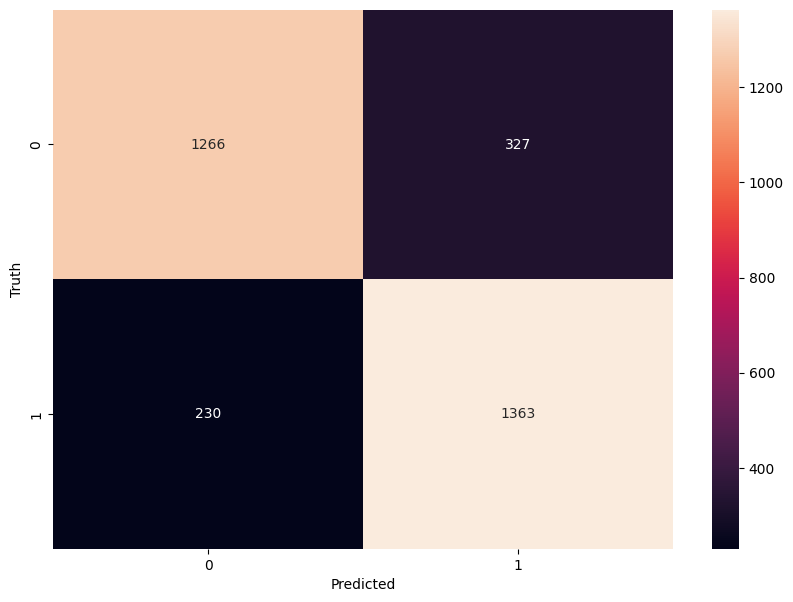

In [51]:
import seaborn as sns
cm = tf.math.confusion_matrix(labels = y_test, predictions = y_preds)

plt.figure(figsize = (10, 7))
sns.heatmap(cm, annot = True, fmt = 'd')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()